In [1]:
import pandas as pd
import os,sys
import networkx as nx

import pandas as pd
from os.path import join as opj
from tqdm import tqdm

import numpy as np
from itertools import chain
import pickle

import gensim
import random
import multiprocessing
from collections import defaultdict
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns
import itertools

In [2]:
rebel_rels = pd.read_pickle('./data/REBEL/arxiv/arxiv_main_graph.pickle')
pfn_rels = pd.read_pickle('./data/PFN/arxiv/extracted_rels_arxiv.pickle')

In [180]:
rebel_rels

,edge,source,target
0,has part,2d field theory,2d one
1,part of,2d one,2d field theory
2,facet of,original model,scale invariant theory
3,subclass of,2d conformal model,conformal model
4,subclass of,noise free KPZ equation,reaction diffusion equation
...,...,...,...
1277531,facet of,shot capability,system
1277532,subclass of,adversarial training problem,meta learning
1277533,use,generator,training
1277534,use,discriminator,training


In [181]:
pfn_rels

,source,target,edge
4,categorical form,structure,Feature-of
6,approach,quantization of causal sites,Used-for
7,projective threespace,smooth quartic surface,Feature-of
10,object detector,bootstrap particle filter PF,Used-for
21,algorithm,alternatives,Compare
...,...,...,...
1098582,throughput,resource bounds,Conjunction
1098592,minimal latency,baselines,Evaluate-for
1098593,minimal latency,resource bounds,Conjunction
1098604,query level accuracy,baselines,Evaluate-for


# Analysis
## a. Most frequent relations 

In [ ]:
pfn_rel

## b. Relations distribution

In [29]:
def get_relation_value_counts(data):
    unique_relation_types_counter = dict(Counter(data))
    unique_relation_types_vc = dict(sorted(unique_relation_types_counter.items(), key=lambda t: t[1], reverse=True))
    return unique_relation_types_vc

In [30]:
def plot_dist(data, title='PFN: Realtions distribution', xlabel='Relation type', ylabel='# of relations', top_n=20):
    plt.figure(figsize=(13, 7))# (16, 12))
    data = dict(itertools.islice(data.items(), top_n))
    sns.barplot(x=list(data.keys()), y=list(data.values()))
    plt.xticks(rotation=85, fontsize=14)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### PFN method

In [31]:
pfn_relation_types_vc = get_relation_value_counts(pfn_rels.edge)

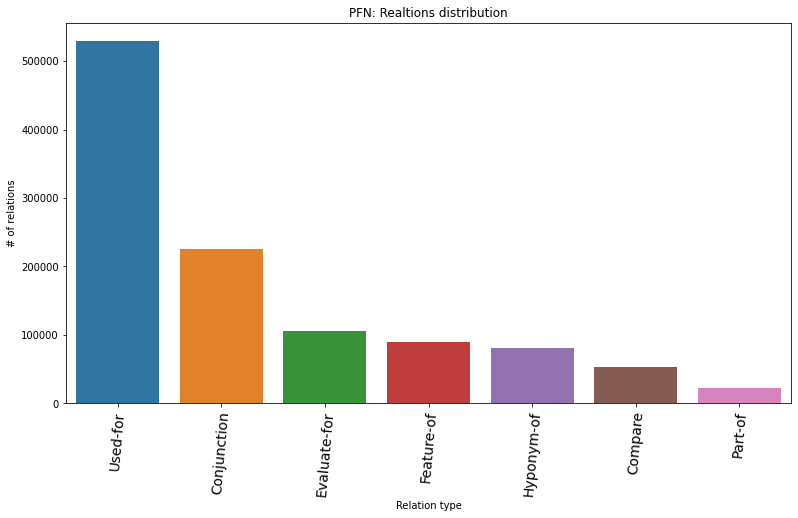

In [204]:
plot_dist(data=pfn_relation_types_vc, title='PFN: Realtions distribution', xlabel='Relation type', ylabel='# of relations')

### REBEL

In [32]:
rebel_relation_types_vc = get_relation_value_counts(rebel_rels.edge)

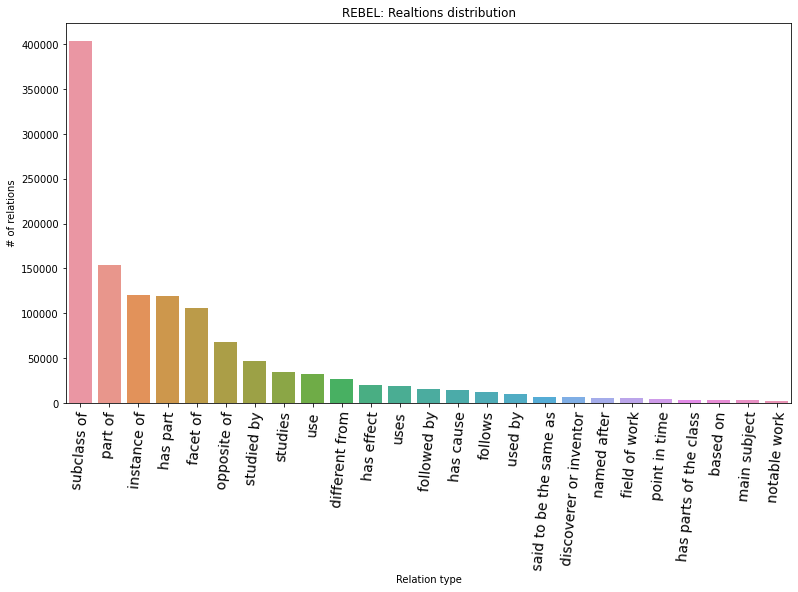

In [253]:
plot_dist(data=rebel_relation_types_vc, title='REBEL: Realtions distribution', xlabel='Relation type', ylabel='# of relations', top_n=25)

## c. Hub vertices across 

### PFN

In [33]:
def get_entity_value_counts(data):
    unique_entity_counter = dict(Counter(data))
    unique_entity_vc = dict(sorted(unique_entity_counter.items(), key=lambda t: t[1], reverse=True))
    return unique_entity_vc

In [34]:
pfn_source_entity_vc = get_entity_value_counts(pfn_rels.source)

In [45]:
# postprocessing: 
source_keys_to_unite_pfn = {'methods': 'method', 'approaches': 'approach', 'techniques': 'technique', 'It': 'it', 'models': 'model', 'algorithms': 'algorithm', 'datasets': 'dataset'}
for k, v in source_keys_to_unite_pfn.items():
    pfn_source_entity_vc[v] += pfn_source_entity_vc[k]
    del pfn_source_entity_vc[k]
pfn_source_entity_vc = dict(sorted(pfn_source_entity_vc.items(), key=lambda t: t[1], reverse=True))


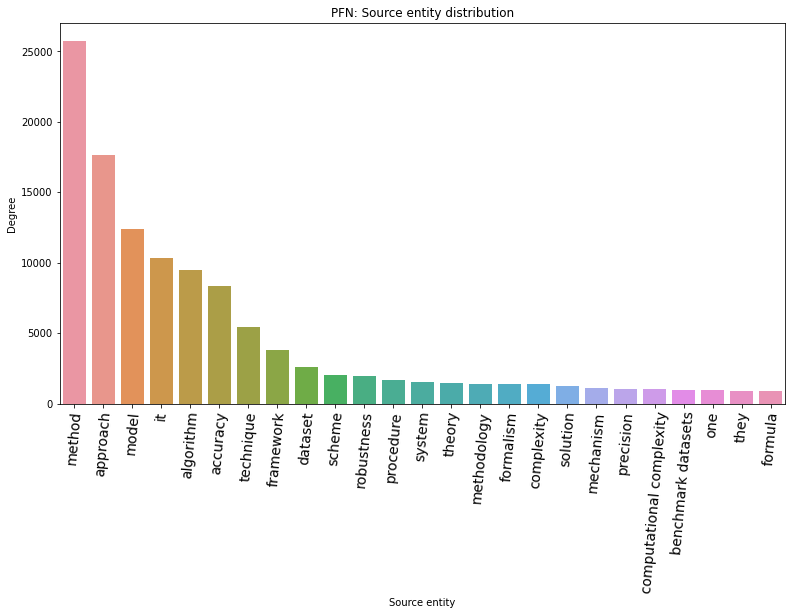

In [46]:
plot_dist(data=pfn_source_entity_vc, title='PFN: Source entity distribution', xlabel='Source entity', ylabel='Degree', top_n=25)

In [47]:
pfn_target_entity_vc = get_entity_value_counts(pfn_rels.target)

In [48]:
pfn_target_entity_vc
# postprocessing: 
target_keys_to_unite_pfn = {
    'methods': 'method', 
    'problems': 'problem',
    'approaches': 'approach', 
    'techniques': 'technique', 
    'It': 'it', 'models': 'model',
    'algorithms': 'algorithm', 'datasets': 'dataset',
    'tasks': 'task', 'systems': 'system',
    'schemes': 'scheme', 'ones': 'one',
    'networks': 'network',
    'solutions': 'solution'
}
for k, v in target_keys_to_unite_pfn.items():
    pfn_target_entity_vc[v] += pfn_target_entity_vc[k]
    del pfn_target_entity_vc[k]
pfn_target_entity_vc = dict(sorted(pfn_target_entity_vc.items(), key=lambda t: t[1], reverse=True))


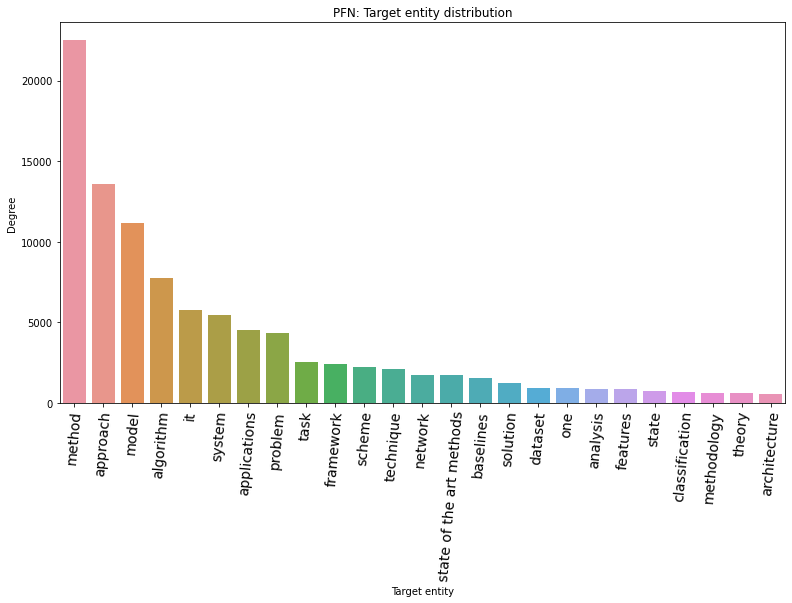

In [49]:
plot_dist(data=pfn_target_entity_vc, title='PFN: Target entity distribution', xlabel='Target entity', ylabel='Degree', top_n=25)

### Rebel

In [247]:
rebel_source_entity_vc = get_entity_value_counts(rebel_rels.source)

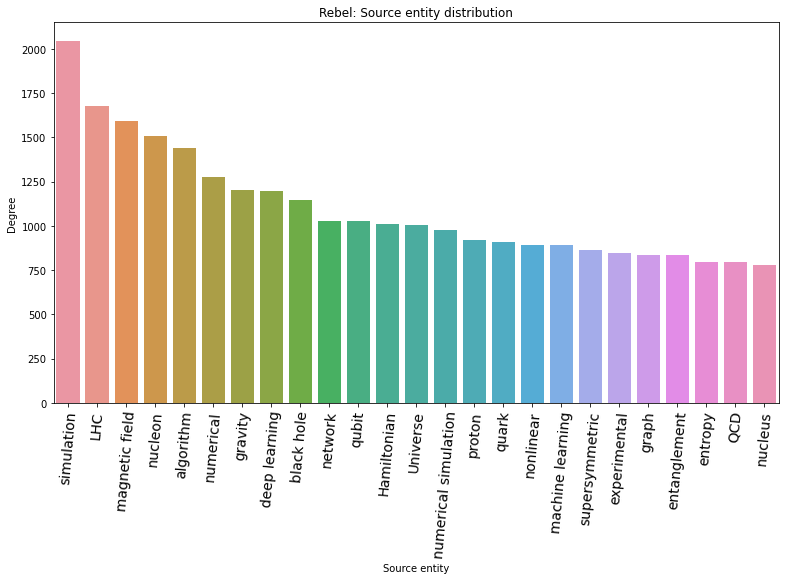

In [249]:
plot_dist(data=rebel_source_entity_vc, title='Rebel: Source entity distribution', xlabel='Source entity', ylabel='Degree', top_n=25)

In [250]:
rebel_target_entity_vc = get_entity_value_counts(rebel_rels.target)

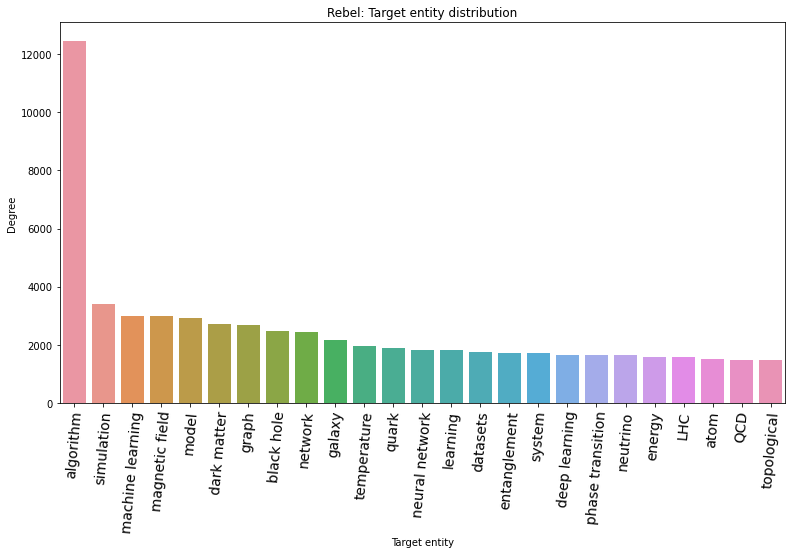

In [251]:
plot_dist(data=rebel_target_entity_vc, title='Rebel: Target entity distribution', xlabel='Target entity', ylabel='Degree', top_n=25)

## Graphs rendering

### REBEL

In [396]:
rebel_rels

,edge,source,target
0,has part,2d field theory,2d one
1,part of,2d one,2d field theory
2,facet of,original model,scale invariant theory
3,subclass of,2d conformal model,conformal model
4,subclass of,noise free KPZ equation,reaction diffusion equation
...,...,...,...
1277531,facet of,shot capability,system
1277532,subclass of,adversarial training problem,meta learning
1277533,use,generator,training
1277534,use,discriminator,training


In [3]:
rebel_rels_no_duplicates = rebel_rels.drop_duplicates()


In [21]:
def random_subgraph(relations, entity='deep learning', n_edges=7):
    dl_rel = relations[relations.source==entity]
    sources, targets = [], []
    chosen_edges = []
    chosen_edges.append(dl_rel.iloc[0])
    sources.append(chosen_edges[0].source)
    targets.append(chosen_edges[0].target)
    for item, vc in dict(relations.edge.value_counts()).items():
        chosen_edges_item = []
        print(item)
        cur_df = relations[relations.edge==item]
        for triple in tqdm(cur_df.iterrows(), total=len(cur_df)):
            if triple[1].source in sources or triple[1].target in targets:
                chosen_edges_item.append(triple[1])
                print(len(chosen_edges_item))
                sources.append(triple[1].source)
                targets.append(triple[1].target)
            if len(chosen_edges_item) == min(n_edges, vc*0.03):
                print('Finished:', item)
                chosen_edges.append(chosen_edges_item)
                break
    out = list(chain(*chosen_edges[1:]))
    out.append(chosen_edges[0])
    return out

In [6]:
random_edges = random_subgraph(relations =rebel_rels_no_duplicates)

subclass of


  1%|          | 1980/365831 [00:00<00:19, 18744.43it/s]

1
2
3
4
5
6
7
Finished: subclass of
part of



  0%|          | 570/132309 [00:00<00:07, 17952.91it/s]

1
2
3
4
5
6
7
Finished: part of
instance of



  1%|          | 913/112248 [00:00<00:06, 18016.21it/s]


1
2
3
4
5
6
7
Finished: instance of
has part


  1%|          | 1016/103449 [00:00<00:05, 18293.02it/s]


1
2
3
4
5
6
7
Finished: has part
facet of


  0%|          | 166/100760 [00:00<00:05, 17467.94it/s]


1
2
3
4
5
6
7
Finished: facet of
opposite of


  3%|▎         | 1871/58177 [00:00<00:03, 18707.56it/s]

1
2


  5%|▍         | 2846/58177 [00:00<00:03, 18377.04it/s]


3
4
5
6
7
Finished: opposite of
studied by


  1%|          | 311/41955 [00:00<00:02, 17008.22it/s]

1
2
3
4
5
6
7
Finished: studied by
studies



  1%|          | 218/31288 [00:00<00:01, 17784.92it/s]

1
2
3
4
5
6
7
Finished: studies
use



  1%|          | 171/31005 [00:00<00:01, 17567.44it/s]


1
2
3
4
5
6
7
Finished: use
different from


  0%|          | 0/24727 [00:00<?, ?it/s]

1
2
3
4
5


  5%|▌         | 1327/24727 [00:00<00:01, 17695.80it/s]


6
7
Finished: different from
uses


  1%|▏         | 278/18676 [00:00<00:01, 16527.99it/s]


1
2
3
4
5
6
7
Finished: uses
has effect


  4%|▍         | 739/18283 [00:00<00:01, 17398.28it/s]

1
2
3
4
5
6
7
Finished: has effect
has cause



  2%|▏         | 287/12904 [00:00<00:00, 17480.07it/s]

1
2
3
4
5
6
7
Finished: has cause
followed by



  0%|          | 0/12445 [00:00<?, ?it/s]

1
2
3
4
5
6


  9%|▊         | 1060/12445 [00:00<00:00, 17177.42it/s]


7
Finished: followed by
follows


  6%|▋         | 672/10609 [00:00<00:00, 17748.08it/s]

1
2
3
4
5
6
7
Finished: follows


used by


  2%|▏         | 189/9935 [00:00<00:00, 17087.50it/s]

1
2
3
4
5
6
7
Finished: used by
said to be the same as



 12%|█▏        | 790/6573 [00:00<00:00, 17031.44it/s]

1
2
3
4
5
6
7
Finished: said to be the same as
discoverer or inventor



  0%|          | 0/6130 [00:00<?, ?it/s]

1
2
3
4


 54%|█████▎    | 3293/6130 [00:00<00:00, 17330.18it/s]


5
6
7
Finished: discoverer or inventor
named after


  0%|          | 0/5083 [00:00<?, ?it/s]

1
2


 29%|██▉       | 1470/5083 [00:00<00:00, 16993.06it/s]

3
4
5
6
7
Finished: named after
field of work



 16%|█▌        | 806/5054 [00:00<00:00, 16715.75it/s]


1
2
3
4
5
6
7
Finished: field of work
based on


  0%|          | 0/3632 [00:00<?, ?it/s]

1
2
3


 62%|██████▏   | 2235/3632 [00:00<00:00, 17125.30it/s]


4
5
6
7
Finished: based on
main subject


  0%|          | 0/2952 [00:00<?, ?it/s]

1
2


 32%|███▏      | 932/2952 [00:00<00:00, 16559.10it/s]


3
4
5
6
7
Finished: main subject
point in time


 64%|██████▍   | 1854/2887 [00:00<00:00, 17013.68it/s]

1
2
3
4
5
6
7
Finished: point in time
notable work



 66%|██████▋   | 1691/2548 [00:00<00:00, 16908.48it/s]

1
2
3
4


100%|██████████| 2548/2548 [00:00<00:00, 16791.19it/s]


has parts of the class


 54%|█████▍    | 1241/2303 [00:00<00:00, 16497.46it/s]


1
2
3
4
5
6
7
Finished: has parts of the class
student


  0%|          | 0/2292 [00:00<?, ?it/s]

1
2


100%|██████████| 2292/2292 [00:00<00:00, 16541.48it/s]


3
4
student of


100%|██████████| 1990/1990 [00:00<00:00, 16727.59it/s]


country


100%|██████████| 1659/1659 [00:00<00:00, 16967.37it/s]


1
product or material produced


  8%|▊         | 106/1352 [00:00<00:00, 11826.88it/s]


1
2
3
4
5
6
7
Finished: product or material produced
depicts


 57%|█████▋    | 659/1157 [00:00<00:00, 16036.66it/s]

1
2
3
4
5
6
7
Finished: depicts
field of this occupation



  9%|▊         | 88/1035 [00:00<00:00, 14826.22it/s]


1
2
3
4
5
6
7
Finished: field of this occupation
practiced by


 13%|█▎        | 126/955 [00:00<00:00, 15345.91it/s]


1
2
3
4
5
6
7
Finished: practiced by
location


100%|██████████| 870/870 [00:00<00:00, 16161.37it/s]


1
influenced by


  0%|          | 0/869 [00:00<?, ?it/s]

1


 99%|█████████▊| 856/869 [00:00<00:00, 15767.64it/s]


2
3
4
5
6
7
Finished: influenced by
located in the administrative territorial entity


100%|██████████| 858/858 [00:00<00:00, 16212.61it/s]


developer


  0%|          | 0/826 [00:00<?, ?it/s]

1
2
3
4
5
6


 96%|█████████▋| 796/826 [00:00<00:00, 15677.58it/s]


7
Finished: developer
programming language


 55%|█████▍    | 452/825 [00:00<00:00, 13922.08it/s]


1
2
3
4
5
6
7
Finished: programming language
shares border with


  0%|          | 0/797 [00:00<?, ?it/s]

1


 57%|█████▋    | 453/797 [00:00<00:00, 14971.04it/s]

2
3
4
5
6
7
Finished: shares border with
author



 67%|██████▋   | 527/788 [00:00<00:00, 15124.59it/s]

1
2
3
4
5
6
7
Finished: author
connects with



  0%|          | 0/769 [00:00<?, ?it/s]

1
2
3
4
5


100%|██████████| 769/769 [00:00<00:00, 15448.89it/s]

publication date



 23%|██▎       | 161/689 [00:00<00:00, 14045.57it/s]

1
2
3
4
5
6
7
Finished: publication date
operator



100%|██████████| 659/659 [00:00<00:00, 15777.33it/s]

derivative work



  0%|          | 0/556 [00:00<?, ?it/s]

1
2
3
4
5
6
7
Finished: 

 82%|████████▏ | 456/556 [00:00<00:00, 15086.35it/s]

derivative work
subject has role



100%|██████████| 491/491 [00:00<00:00, 15523.57it/s]


site of astronomical discovery


 72%|███████▏  | 349/484 [00:00<00:00, 15283.23it/s]

1
2
3
4
5
6
7
Finished: site of astronomical discovery


owned by


 82%|████████▏ | 343/420 [00:00<00:00, 14185.18it/s]


1
2
3
4
5
6
7
Finished: owned by
inception


 14%|█▍        | 47/332 [00:00<00:00, 12795.81it/s]


1
2
3
4
5
6
7
Finished: inception
parent organization


  0%|          | 0/323 [00:00<?, ?it/s]

1


100%|██████████| 323/323 [00:00<00:00, 14682.72it/s]


subsidiary


100%|██████████| 318/318 [00:00<00:00, 14890.69it/s]


spouse


100%|██████████| 314/314 [00:00<00:00, 14928.89it/s]


manufacturer


100%|██████████| 285/285 [00:00<00:00, 14801.96it/s]


owner of


 66%|██████▌   | 180/273 [00:00<00:00, 14702.53it/s]


1
2
3
4
5
6
7
Finished: owner of
participant


 83%|████████▎ | 197/238 [00:00<00:00, 14664.88it/s]


1
2
3
4
5
6
7
Finished: participant
member of


100%|██████████| 233/233 [00:00<00:00, 14480.26it/s]


1
2
3
4
5
6
7
8
9
10
11
12
contains administrative territorial entity


100%|██████████| 212/212 [00:00<00:00, 12805.19it/s]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
is a list of


100%|██████████| 198/198 [00:00<00:00, 13202.43it/s]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
medical condition treated


100%|██████████| 196/196 [00:00<00:00, 13941.18it/s]


significant event


100%|██████████| 196/196 [00:00<00:00, 11597.75it/s]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
creator


100%|██████████| 194/194 [00:00<00:00, 12049.74it/s]


1
2
publisher


100%|██████████| 191/191 [00:00<00:00, 13181.39it/s]


1
2
sport


100%|██████████| 187/187 [00:00<00:00, 12793.35it/s]


drug used for treatment


100%|██████████| 172/172 [00:00<00:00, 13122.46it/s]


twinned administrative body


100%|██████████| 166/166 [00:00<00:00, 12643.54it/s]

1
2
3
4
5
6
7
8
9


published in


100%|██████████| 158/158 [00:00<00:00, 9715.16it/s]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
operating system


100%|██████████| 148/148 [00:00<00:00, 11719.47it/s]


platform


100%|██████████| 142/142 [00:00<00:00, 12049.43it/s]


1
parent taxon


100%|██████████| 141/141 [00:00<00:00, 12071.29it/s]


sibling


100%|██████████| 133/133 [00:00<00:00, 12058.33it/s]


language of work or name


100%|██████████| 129/129 [00:00<00:00, 11126.39it/s]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


constellation


100%|██████████| 126/126 [00:00<00:00, 10775.90it/s]


number of participants


100%|██████████| 120/120 [00:00<00:00, 11550.05it/s]


replaces


  0%|          | 0/118 [00:00<?, ?it/s]

1


100%|██████████| 118/118 [00:00<00:00, 11035.43it/s]


replaced by


100%|██████████| 116/116 [00:00<00:00, 11923.23it/s]


participant in


100%|██████████| 109/109 [00:00<00:00, 11380.26it/s]


1
2
3
4
5
6
7
8
item operated


100%|██████████| 105/105 [00:00<00:00, 11605.71it/s]


1
2
3
4
genre


100%|██████████| 97/97 [00:00<00:00, 10500.37it/s]


1
start time


100%|██████████| 86/86 [00:00<00:00, 11069.82it/s]

1
2
3
4
5
6
7
industry



100%|██████████| 81/81 [00:00<00:00, 11318.58it/s]

1
2
3
located in or next to body of water



100%|██████████| 74/74 [00:00<00:00, 10341.12it/s]

1
2
3
4
5
6
7
8
9
10
11
12
13
14


diplomatic relation


100%|██████████| 73/73 [00:00<00:00, 9137.10it/s]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
length



100%|██████████| 65/65 [00:00<00:00, 10728.39it/s]

area



100%|██████████| 63/63 [00:00<00:00, 10627.89it/s]

1
2
organizer



100%|██████████| 59/59 [00:00<00:00, 10753.69it/s]

work period (start)



100%|██████████| 58/58 [00:00<00:00, 10500.70it/s]


1
2
employer


100%|██████████| 54/54 [00:00<00:00, 10594.15it/s]


1
distributed by


100%|██████████| 53/53 [00:00<00:00, 10725.05it/s]


occupation


100%|██████████| 53/53 [00:00<00:00, 10754.11it/s]


service entry


100%|██████████| 53/53 [00:00<00:00, 10247.46it/s]


1
2
3
4
language used


100%|██████████| 50/50 [00:00<00:00, 8574.50it/s]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
writing system


100%|██████████| 49/49 [00:00<00:00, 9810.53it/s]


1
2
3
4
5
6
7
capital


100%|██████████| 48/48 [00:00<00:00, 9494.30it/s]

1
2
3
4
5
6
7
8
9
10


part of the series


100%|██████████| 47/47 [00:00<00:00, 9881.81it/s]


1
2
continent


100%|██████████| 45/45 [00:00<00:00, 8288.77it/s]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
applies to jurisdiction


100%|██████████| 44/44 [00:00<00:00, 8545.14it/s]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
headquarters location


100%|██████████| 41/41 [00:00<00:00, 8706.72it/s]


1
2
3
4
5
6
7
located on terrain feature


100%|██████████| 36/36 [00:00<00:00, 9467.95it/s]


1
2
elevation above sea level


100%|██████████| 35/35 [00:00<00:00, 9605.49it/s]


1
educated at


100%|██████████| 35/35 [00:00<00:00, 9674.49it/s]


designed by


100%|██████████| 33/33 [00:00<00:00, 9568.09it/s]

tributary



100%|██████████| 27/27 [00:00<00:00, 9313.78it/s]


end time


100%|██████████| 27/27 [00:00<00:00, 9183.12it/s]


1
mouth of the watercourse


100%|██████████| 26/26 [00:00<00:00, 9115.00it/s]


1
country of origin


100%|██████████| 26/26 [00:00<00:00, 7486.23it/s]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
date of birth


100%|██████████| 25/25 [00:00<00:00, 9166.68it/s]


time period


100%|██████████| 24/24 [00:00<00:00, 9208.13it/s]


award received


100%|██████████| 23/23 [00:00<00:00, 9122.36it/s]


stock exchange


100%|██████████| 22/22 [00:00<00:00, 8719.97it/s]


1
2
present in work


100%|██████████| 22/22 [00:00<00:00, 9057.19it/s]


maintained by


100%|██████████| 21/21 [00:00<00:00, 9047.81it/s]


taxonomic type


100%|██████████| 20/20 [00:00<00:00, 8894.72it/s]


number of episodes


100%|██████████| 19/19 [00:00<00:00, 8707.58it/s]


1
characters


100%|██████████| 19/19 [00:00<00:00, 8761.19it/s]


sports discipline competed in


100%|██████████| 16/16 [00:00<00:00, 8626.93it/s]


member of political party


100%|██████████| 16/16 [00:00<00:00, 8804.63it/s]


movement


100%|██████████| 15/15 [00:00<00:00, 8577.31it/s]


father


100%|██████████| 14/14 [00:00<00:00, 8441.67it/s]


work location


100%|██████████| 13/13 [00:00<00:00, 7942.60it/s]


1
sports season of league or competition


100%|██████████| 13/13 [00:00<00:00, 8565.18it/s]


position held


100%|██████████| 13/13 [00:00<00:00, 8334.75it/s]


endemic to


100%|██████████| 12/12 [00:00<00:00, 7837.38it/s]


1
capital of


100%|██████████| 12/12 [00:00<00:00, 7356.28it/s]


1
2
3
4
encodes


100%|██████████| 12/12 [00:00<00:00, 8129.81it/s]


child


100%|██████████| 12/12 [00:00<00:00, 8276.87it/s]


editor


100%|██████████| 12/12 [00:00<00:00, 7870.47it/s]


1
2
3
4
composer


100%|██████████| 12/12 [00:00<00:00, 8168.07it/s]


winner


100%|██████████| 11/11 [00:00<00:00, 7949.23it/s]


event distance


100%|██████████| 10/10 [00:00<00:00, 7925.74it/s]


founded by


100%|██████████| 10/10 [00:00<00:00, 7833.96it/s]


conferred by


100%|██████████| 9/9 [00:00<00:00, 7838.19it/s]


affiliation


100%|██████████| 9/9 [00:00<00:00, 7749.69it/s]


architect


100%|██████████| 9/9 [00:00<00:00, 7672.51it/s]


basin country


100%|██████████| 9/9 [00:00<00:00, 6297.75it/s]


1
2
3
4
5
6
date of death


100%|██████████| 8/8 [00:00<00:00, 7369.74it/s]


religious order


100%|██████████| 7/7 [00:00<00:00, 7154.03it/s]


performer


100%|██████████| 7/7 [00:00<00:00, 7222.66it/s]


conflict


100%|██████████| 7/7 [00:00<00:00, 6299.10it/s]


1
2
3
religion


100%|██████████| 7/7 [00:00<00:00, 7045.87it/s]


country of citizenship


100%|██████████| 7/7 [00:00<00:00, 6584.46it/s]


1
location of formation


100%|██████████| 6/6 [00:00<00:00, 5882.61it/s]


1
league


100%|██████████| 6/6 [00:00<00:00, 6759.56it/s]


mountain range


100%|██████████| 6/6 [00:00<00:00, 6885.31it/s]


family


100%|██████████| 6/6 [00:00<00:00, 7004.13it/s]


population


100%|██████████| 6/6 [00:00<00:00, 7009.98it/s]


number of articles


100%|██████████| 5/5 [00:00<00:00, 6107.02it/s]


1
2
3
4
dissolved, abolished or demolished date


100%|██████████| 5/5 [00:00<00:00, 5945.99it/s]


1
sports league level


100%|██████████| 5/5 [00:00<00:00, 6601.05it/s]


candidate


100%|██████████| 5/5 [00:00<00:00, 6666.09it/s]


operating area


100%|██████████| 5/5 [00:00<00:00, 5649.66it/s]


1
2
place served by transport hub


100%|██████████| 4/4 [00:00<00:00, 6129.78it/s]


ranking


100%|██████████| 4/4 [00:00<00:00, 5868.21it/s]


1
part


100%|██████████| 4/4 [00:00<00:00, 6154.52it/s]


indigenous to


100%|██████████| 4/4 [00:00<00:00, 6107.47it/s]


number of characters


100%|██████████| 4/4 [00:00<00:00, 6100.81it/s]


highest point


100%|██████████| 4/4 [00:00<00:00, 5917.89it/s]


1
candidacy in election


100%|██████████| 4/4 [00:00<00:00, 6098.59it/s]


legislative body


100%|██████████| 4/4 [00:00<00:00, 6141.00it/s]


legislated by


100%|██████████| 4/4 [00:00<00:00, 5930.44it/s]


carries


100%|██████████| 3/3 [00:00<00:00, 5208.16it/s]


ethnic group


100%|██████████| 3/3 [00:00<00:00, 5131.69it/s]


1
officeholder


100%|██████████| 3/3 [00:00<00:00, 5440.08it/s]


mother


100%|██████████| 3/3 [00:00<00:00, 5414.33it/s]


court


100%|██████████| 3/3 [00:00<00:00, 5386.52it/s]


cast member


100%|██████████| 3/3 [00:00<00:00, 5313.73it/s]


member of sports team


100%|██████████| 3/3 [00:00<00:00, 5400.39it/s]


office held by head of government


100%|██████████| 3/3 [00:00<00:00, 5275.85it/s]


presenter


100%|██████████| 3/3 [00:00<00:00, 4750.06it/s]


origin of the watercourse


100%|██████████| 3/3 [00:00<00:00, 4610.81it/s]


instrument


100%|██████████| 3/3 [00:00<00:00, 4815.50it/s]


1
occupant


100%|██████████| 3/3 [00:00<00:00, 5402.71it/s]


office held by head of the organization


100%|██████████| 2/2 [00:00<00:00, 4266.84it/s]


1
place of burial


100%|██████████| 2/2 [00:00<00:00, 4536.84it/s]


production company


100%|██████████| 2/2 [00:00<00:00, 4517.29it/s]


shares border


100%|██████████| 2/2 [00:00<00:00, 4485.89it/s]


collection


100%|██████████| 2/2 [00:00<00:00, 4571.45it/s]


instance


100%|██████████| 2/2 [00:00<00:00, 4445.47it/s]


appointed by


100%|██████████| 2/2 [00:00<00:00, 4436.07it/s]


political ideology


100%|██████████| 2/2 [00:00<00:00, 4507.58it/s]


start point


100%|██████████| 2/2 [00:00<00:00, 4450.19it/s]


original broadcaster


100%|██████████| 2/2 [00:00<00:00, 4337.44it/s]


BBB


100%|██████████| 2/2 [00:00<00:00, 4440.77it/s]


authority


100%|██████████| 2/2 [00:00<00:00, 4485.89it/s]


subclass of <triplet>omega


100%|██████████| 1/1 [00:00<00:00, 3030.57it/s]


age


100%|██████████| 1/1 [00:00<00:00, 3063.77it/s]


place of birth


100%|██████████| 1/1 [00:00<00:00, 2702.52it/s]


1
inflows


100%|██████████| 1/1 [00:00<00:00, 3045.97it/s]


number of possibilities


100%|██████████| 1/1 [00:00<00:00, 2723.57it/s]


1
architectural style


100%|██████████| 1/1 [00:00<00:00, 3006.67it/s]


number of stages


100%|██████████| 1/1 [00:00<00:00, 3030.57it/s]


opposite of perfect matchings


100%|██████████| 1/1 [00:00<00:00, 2974.68it/s]


place of death


100%|██████████| 1/1 [00:00<00:00, 3079.52it/s]


season of club or team


100%|██████████| 1/1 [00:00<00:00, 2962.08it/s]


crosses


100%|██████████| 1/1 [00:00<00:00, 2878.73it/s]


successful candidate


100%|██████████| 1/1 [00:00<00:00, 3008.83it/s]


diocese


100%|██████████| 1/1 [00:00<00:00, 2341.88it/s]


performance level


100%|██████████| 1/1 [00:00<00:00, 2448.51it/s]


military rank


100%|██████████| 1/1 [00:00<00:00, 2739.58it/s]


located on street


100%|██████████| 1/1 [00:00<00:00, 2890.63it/s]


subclass of <triplet>'myosin'


100%|██████████| 1/1 [00:00<00:00, 2943.37it/s]


part of the paper present such a cognitive architecture


100%|██████████| 1/1 [00:00<00:00, 2976.79it/s]


has


100%|██████████| 1/1 [00:00<00:00, 2983.15it/s]


home venue


100%|██████████| 1/1 [00:00<00:00, 2943.37it/s]


site of astronomical


100%|██████████| 1/1 [00:00<00:00, 2941.31it/s]


instance of <triplet>'second class' constraint


100%|██████████| 1/1 [00:00<00:00, 2987.40it/s]


place in the history of fluid mechanics


100%|██████████| 1/1 [00:00<00:00, 2832.08it/s]


opposite of complementary way of approaching this problem


100%|██████████| 1/1 [00:00<00:00, 2904.64it/s]


position played on team / speciality


100%|██████████| 1/1 [00:00<00:00, 2935.13it/s]


above sea level


100%|██████████| 1/1 [00:00<00:00, 2976.79it/s]


area of work


100%|██████████| 1/1 [00:00<00:00, 2939.25it/s]


number of users


100%|██████████| 1/1 [00:00<00:00, 2962.08it/s]


FPS


100%|██████████| 1/1 [00:00<00:00, 2970.47it/s]


part of CCDA


100%|██████████| 1/1 [00:00<00:00, 2995.93it/s]


subclass


100%|██████████| 1/1 [00:00<00:00, 2949.58it/s]


follows Trang's work in 8


100%|██████████| 1/1 [00:00<00:00, 2966.27it/s]


number of lines


100%|██████████| 1/1 [00:00<00:00, 2951.66it/s]


connecting line


100%|██████████| 1/1 [00:00<00:00, 2953.74it/s]


part of <triplet>maser


100%|██████████| 1/1 [00:00<00:00, 2962.08it/s]


located in the administrative territorial


100%|██████████| 1/1 [00:00<00:00, 2964.17it/s]


number of parameters


100%|██████████| 1/1 [00:00<00:00, 2922.86it/s]


number of dimensions


100%|██████████| 1/1 [00:00<00:00, 3006.67it/s]


part of PCAC


100%|██████████| 1/1 [00:00<00:00, 2951.66it/s]


In [7]:
df = pd.DataFrame(random_edges, columns=['edge', 'source', 'target'])

In [10]:
import random
from random import randint
def generate_color_map(data):

    random.seed(42)
    color = []
    n = len(data.edge.value_counts())

    for i in range(n):
        color.append('#%06X' % randint(0, 0xFFFFFF))

    color_map = dict(zip(list(data.edge.value_counts().index), 
                     color))
    return color_map

In [11]:
color_map = generate_color_map(df)

In [12]:
color_map

{'part of': '#390062',
 'subclass of': '#0CCE35',
 'point in time': '#8CD0A4',
 'has parts of the class': '#7D6277',
 'product or material produced': '#7248AD',
 'depicts': '#477183',
 'field of this occupation': '#347A3F',
 'practiced by': '#2C833F',
 'influenced by': '#D80623',
 'developer': '#1045D1',
 'programming language': '#0F4194',
 'shares border with': '#2FF8D2',
 'author': '#6FF151',
 'publication date': '#771F54',
 'derivative work': '#0D961F',
 'site of astronomical discovery': '#65CE0C',
 'owned by': '#D6CB4D',
 'inception': '#70DD97',
 'owner of': '#E5FEBA',
 'main subject': '#8E6F03',
 'based on': '#0353CE',
 'field of work': '#51BEDD',
 'different from': '#D860EA',
 'instance of': '#AE3550',
 'has part': '#8E4527',
 'facet of': '#4F9B02',
 'opposite of': '#6E3D9A',
 'studied by': '#AC561E',
 'studies': '#3454E7',
 'use': '#2F7C62',
 'uses': '#C285D4',
 'named after': '#3184CF',
 'has effect': '#B7CC25',
 'has cause': '#B01AF6',
 'followed by': '#876F47',
 'follows': '#

In [26]:
from pyvis.network import Network

def visualize(G, colormap, out_filename = 'subgraph_rebel.html'):
    net = Network(height="100%", width="100%", notebook=True, directed=True)
    # uncomment the following if the graph is large
    # N.barnes_hut(spring_strength=0.006)

    for n in G:
        net.add_node(n, label=n)

    for e in G.edges(data=True):
    
        net.add_edge(e[0], e[1], color=colormap[e[2]['edge']], title=e[2]['edge'])

    net.write_html(out_filename)  # save a html file in current dir

In [17]:
visualize(nx.from_pandas_edgelist(df, "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph()), colormap=color_map, out_filename='subgraph_rebel.html')

### PFN

In [69]:
pfn_rels_no_duplicates = pfn_rels.drop_duplicates()


In [70]:
pfn_rels_no_duplicates = pfn_rels_no_duplicates.replace({"source": source_keys_to_unite_pfn})
pfn_rels_no_duplicates = pfn_rels_no_duplicates.replace({"target": target_keys_to_unite_pfn})
# pfn_rels_no_duplicates['target'] = pfn_rels_no_duplicates['target'].map(target_keys_to_unite_pfn, na_action='ignore')

In [71]:
pfn_rels_no_duplicates

,source,target,edge
4,categorical form,structure,Feature-of
6,approach,quantization of causal sites,Used-for
7,projective threespace,smooth quartic surface,Feature-of
10,object detector,bootstrap particle filter PF,Used-for
21,algorithm,alternatives,Compare
...,...,...,...
1098582,throughput,resource bounds,Conjunction
1098592,minimal latency,baselines,Evaluate-for
1098593,minimal latency,resource bounds,Conjunction
1098604,query level accuracy,baselines,Evaluate-for


In [72]:
random_edges_pfn = random_subgraph(relations =pfn_rels_no_duplicates, n_edges=15)

Used-for


  0%|          | 1911/475887 [00:00<00:24, 19102.28it/s]

1
2
3
4
5
6
7
8
9


  1%|          | 3308/475887 [00:00<00:25, 18669.27it/s]


10
11
12
13
14
15
Finished: Used-for
Conjunction


  0%|          | 0/196286 [00:00<?, ?it/s]

1


  2%|▏         | 3744/196286 [00:00<00:10, 18621.81it/s]

2
3
4
5
6


  5%|▍         | 9338/196286 [00:00<00:10, 18606.25it/s]

7
8
9
10
11
12
13
14


  5%|▌         | 10726/196286 [00:00<00:09, 18565.90it/s]


15
Finished: Conjunction
Feature-of


  1%|          | 797/82084 [00:00<00:04, 17356.04it/s]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Finished: Feature-of
Evaluate-for


  0%|          | 100/81030 [00:00<00:05, 16036.95it/s]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Finished: Evaluate-for
Hyponym-of



  1%|          | 590/72829 [00:00<00:04, 17153.67it/s]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Finished: Hyponym-of
Compare



  0%|          | 126/42617 [00:00<00:02, 15884.17it/s]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Finished: Compare
Part-of


  1%|          | 208/20439 [00:00<00:01, 16861.52it/s]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Finished: Part-of


In [73]:
df_pfn = pd.DataFrame(random_edges_pfn, columns=['edge', 'source', 'target'])

In [74]:
color_map_pfn = generate_color_map(df_pfn)

In [75]:
visualize(nx.from_pandas_edgelist(df_pfn, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph()), colormap=color_map_pfn,  out_filename='subgraph_pfn.html')

## Sample corpus of random walks

In [8]:
def init_child(_graph, _pars):
    global G, n_iters, seed, w_length
    G = _graph
    n_iters = _pars["niters"]
    seed = _pars["seed"]
    w_length = _pars['w_length']


def run_walks_g(start_node):
    corpus = []
    random.seed(seed)
    np.random.seed(seed)
    for chosen_node in [start_node]:
        for _ in range(n_iters):
            path = [chosen_node]
            for _ in range(w_length-1):
                neighbors = G.successors(path[-1])
                filtered_neighbors = set(neighbors) - set(path)
                filtered_neighbors = list(set(filtered_neighbors))
                filtered_neighbors.sort()
                if len(filtered_neighbors) == 0:
                        break
                next_node = np.random.choice(filtered_neighbors)
                path.append(next_node)
            
            corpus.append(path)
    return corpus


def sample_heterogeneous_random_walks(graph):

    threads = 12
    chunkdiv = 20
    walks_per_node = 5
    seed = 42
    walk_length = 20

    available_start_nodes = np.array(graph.nodes())
    available_start_nodes.sort()


    chlen = len(available_start_nodes)//(threads*chunkdiv)
    pbar = tqdm(total=len(available_start_nodes))
    res = []
    pars = {}

    pars["seed"] = seed
    pars["niters"] = walks_per_node
    pars["w_length"] = walk_length

    pool = multiprocessing.Pool(processes=threads, initializer=init_child,
                initargs=(graph, pars))

    for walk in pool.imap(run_walks_g, available_start_nodes, chunksize=chlen):
        res += walk #.append("\n".join(walk) )
        pbar.update(1)
    pool.close()
    pool.join()

    return res

In [9]:
def get_unique_entities(walks):
    walks = [walk for walk in walks if len(walk) > 1]
    chain_walks = list(chain(*walks))
    unique_tokens_in_corpus = set(chain_walks)
    print('Number of unique tokens in corpus: ', len(unique_tokens_in_corpus))
    return walks, unique_tokens_in_corpus

def get_embeddings(unique_tokens, model, out_filename):
    dict_of_tokens_df = {}
    for token in unique_tokens:
        try:
            dict_of_tokens_df[token] = model.wv[token]
        except KeyError:
            pass
    entity_embeddings = pd.DataFrame(dict_of_tokens_df).transpose().rename_axis('entity').reset_index()
    entity_embeddings.to_pickle(out_filename)
    return entity_embeddings



## Embeddings for PFN graph

In [10]:
pfn_graph = nx.from_pandas_edgelist(pfn_rels, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

In [11]:
print(nx.info(pfn_graph))

MultiDiGraph with 758783 nodes and 971172 edges


In [12]:
walks_pfn = sample_heterogeneous_random_walks(graph=pfn_graph)

100%|██████████| 758783/758783 [01:48<00:00, 6981.16it/s] 


In [13]:
with open('pfn_graph_rw.pickle', 'wb') as handle:
    pickle.dump(walks_pfn, handle)

In [14]:
corpus_pfn, unique_tokens_in_corpus_pfn = get_unique_entities(walks=walks_pfn)

Number of unique tokens in corpus:  665477


In [15]:
model_pfn = gensim.models.Word2Vec(sentences=corpus_pfn, min_count=1, vector_size=64, seed=42, sg=1, workers=7) # workers=self.workers

In [16]:
pfn_embeddings = get_embeddings(unique_tokens=unique_tokens_in_corpus_pfn, model=model_pfn, out_filename='pfn_embeddings_w2v.pickle')

In [17]:
pfn_embeddings

,entity,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,higher dimensional manifold,0.034547,-0.094241,0.047035,0.009159,0.003111,-0.066225,-0.002496,-0.015083,-0.001848,...,0.013181,0.012880,-0.014165,-0.059290,-0.060364,-0.028410,-0.000160,0.016618,0.123714,0.081467
1,robot architectures,0.030633,-0.062755,0.059944,0.012458,0.045975,-0.052501,0.016918,0.013015,-0.044257,...,0.004330,-0.001469,0.006013,-0.056168,-0.063509,-0.047416,-0.005274,0.040821,0.099596,0.045311
2,three dimensional pipe flow,0.028886,-0.072850,0.042598,-0.001262,0.027652,-0.055588,0.000206,-0.015575,-0.033364,...,-0.015947,-0.002446,0.008044,-0.031799,-0.016319,-0.023055,-0.017007,0.025399,0.083774,0.060422
3,solenoid lens,0.050770,-0.057781,0.061612,0.005901,0.015192,-0.080932,0.009246,-0.029574,-0.021362,...,0.026900,-0.003139,-0.012888,-0.051014,-0.055189,-0.032900,0.011352,0.040711,0.138401,0.087603
4,MiniONN,0.109976,-0.161539,0.086551,-0.011095,0.058066,-0.112867,-0.019754,-0.022982,-0.058417,...,0.022290,-0.036908,-0.053206,-0.066526,-0.148938,-0.088734,-0.001461,0.063101,0.175885,0.082884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665472,orthogonal class,0.062711,-0.122307,0.104362,0.001267,0.050982,-0.112246,0.004408,-0.038099,-0.035520,...,0.037834,0.011703,0.004909,-0.058276,-0.071168,-0.063151,-0.022430,0.059500,0.173696,0.104555
665473,log Sobolev type inequality,0.109666,-0.149745,0.137818,0.030483,0.003911,-0.120372,0.014793,-0.035571,-0.095974,...,0.000479,0.021303,0.000296,-0.075577,-0.043531,-0.110518,0.008867,0.051127,0.147361,0.103354
665474,superplasticity,0.071894,-0.127764,0.062424,0.004395,0.056917,-0.084671,-0.016921,-0.000683,-0.023228,...,0.014003,0.009251,-0.006899,-0.083336,-0.064868,-0.054701,-0.012754,0.066114,0.161611,0.097339
665475,sums of Hilbert space frames,0.095777,-0.145915,0.134581,0.017444,0.044417,-0.154594,0.023935,-0.041457,-0.046342,...,0.039521,0.014362,0.002289,-0.121797,-0.098378,-0.091944,0.004156,0.085312,0.211144,0.137188


## Embeddings for REBEL

In [18]:
rebel_graph = nx.from_pandas_edgelist(rebel_rels, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

In [19]:
print(nx.info(rebel_graph))

MultiDiGraph with 664132 nodes and 1149782 edges


In [20]:
walks_rebel = sample_heterogeneous_random_walks(graph=rebel_graph)

100%|██████████| 664132/664132 [01:17<00:00, 8577.09it/s] 


In [21]:
with open('rebel_graph_rw.pickle', 'wb') as handle:
    pickle.dump(walks_rebel, handle)

In [22]:
corpus_rebel, unique_tokens_in_corpus_rebel = get_unique_entities(walks=walks_rebel)

Number of unique tokens in corpus:  639146


In [23]:
model_rebel = gensim.models.Word2Vec(sentences=corpus_rebel, min_count=1, vector_size=64, seed=42, sg=1, workers=7) # workers=self.workers


In [24]:
rebel_embeddings = get_embeddings(unique_tokens=unique_tokens_in_corpus_rebel, model=model_rebel, out_filename='rebel_embeddings_w2v.pickle')

In [25]:
rebel_embeddings

,entity,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,higher dimensional manifold,-0.040160,-0.977115,0.674561,-0.275147,-0.272521,-0.168228,0.499957,0.515158,0.346035,...,-0.308417,0.255880,0.175917,-0.001147,0.334485,0.332582,-0.181207,0.807521,-0.211791,0.248036
1,globally distinguished representation,-0.119682,-0.097797,0.175936,-0.012959,-0.030870,-0.044621,0.066730,-0.054203,0.020064,...,-0.008359,0.012235,0.075498,-0.085041,0.078165,0.024660,-0.084735,-0.005476,-0.007197,-0.014907
2,A like,-0.374899,-0.051359,0.299906,-0.069462,-0.045523,-0.110750,0.243123,-0.132379,0.069445,...,-0.184413,0.109576,0.183808,-0.288676,0.121918,-0.004692,-0.135005,-0.054465,0.101525,-0.089477
3,type case,-0.078717,-0.004304,0.104942,0.004519,-0.062624,0.008192,0.034231,-0.036199,0.002670,...,-0.009738,0.034109,0.032710,-0.014242,0.081406,0.009557,-0.031643,-0.033400,0.017481,0.024278
4,UJT RO,-0.229235,-0.060061,0.360562,-0.043691,-0.026552,0.075704,0.215773,-0.126771,0.088855,...,-0.044169,0.008843,0.134973,-0.129087,0.117914,0.151015,0.003629,-0.033489,0.106454,-0.020332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639141,compute oracle,-0.091289,-0.257443,0.295029,0.029902,-0.132066,-0.282375,0.179305,-0.189810,-0.019033,...,-0.088510,0.202646,0.369558,0.097367,0.096957,-0.071945,-0.301740,-0.019195,-0.208439,0.179664
639142,empty site,-0.121642,-0.195255,0.439108,0.056549,0.163553,-0.049834,0.239073,-0.049745,-0.038428,...,0.161165,0.190312,0.296220,-0.032711,0.143677,0.045085,-0.163888,-0.025018,-0.030917,0.068896
639143,NP equation,-0.129936,-0.024946,0.159205,-0.040806,-0.045693,-0.044762,0.109142,-0.053680,0.043835,...,-0.008899,0.034635,0.045272,-0.079999,0.067197,0.020936,-0.077952,-0.003430,0.024837,0.026088
639144,smooth solid,-0.174145,-0.057076,0.236102,-0.035570,-0.018229,-0.043491,0.133631,-0.133570,0.044193,...,-0.051067,0.077367,0.070251,-0.104165,0.133944,0.035512,-0.139964,0.052482,0.029281,0.000241


# Get classes of entities by relation types

In [32]:
def print_top_entities_for_relation(data, relation_type, entity_type='source'):
    edges = data[data.edge.isin([relation_type])]
    entities = list(edges[entity_type])
    return entities

In [28]:
len(pfn_rels.edge.unique())

7

In [29]:
pfn_rels.edge.unique()

array(['Feature-of', 'Used-for', 'Compare', 'Hyponym-of', 'Evaluate-for',
       'Conjunction', 'Part-of'], dtype=object)

In [33]:
edge_type_entities = {}
for unique_rel in tqdm(pfn_rels.edge.unique(), total=len(pfn_rels.edge.unique())):
    edge_type_entities[unique_rel] = print_top_entities_for_relation(data=pfn_rels, relation_type=unique_rel)
    print(unique_rel, len(edge_type_entities[unique_rel]))


 29%|██▊       | 2/7 [00:00<00:00, 14.60it/s]

Feature-of 82084
Used-for 475887
Compare 42617
Hyponym-of 72829
Evaluate-for 81030



100%|██████████| 7/7 [00:00<00:00, 21.96it/s]

Conjunction 196286
Part-of 20439


In [36]:
pfn_rels.edge.value_counts().values.sum()

971172

# Predict pfn relations using LogReg

In [39]:
pfn_embeddings = pd.read_pickle('./pfn_embeddings_w2v.pickle')

In [40]:
from sklearn.linear_model import LogisticRegression



In [64]:
samples = []
for rel in pfn_rels.edge.unique():
    pfn_rel_type = pfn_rels[pfn_rels.edge==rel]
    pfn_rel_type_negative = pfn_rels[~(pfn_rels.edge==rel)]
    print('Before sample: ', rel, len(pfn_rel_type))
    pfn_sample = pfn_rel_type.sample(frac=.05, replace = False, random_state=42)
    pfn_sample_negative = pfn_rel_type_negative.sample(frac=.05, replace = False, random_state=42)
    print('After sample: ', rel, len(pfn_sample))
    samples.append(pfn_sample)
    samples.append(pfn_sample_negative)

Before sample:  Feature-of 82084
After sample:  Feature-of 4104
Before sample:  Used-for 475887
After sample:  Used-for 23794
Before sample:  Compare 42617
After sample:  Compare 2131
Before sample:  Hyponym-of 72829
After sample:  Hyponym-of 3641
Before sample:  Evaluate-for 81030
After sample:  Evaluate-for 4052
Before sample:  Conjunction 196286
After sample:  Conjunction 9814
Before sample:  Part-of 20439
After sample:  Part-of 1022


In [65]:
test_edges_pfn = pd.concat(samples, axis=0)

In [66]:
test_edges_pfn

,source,target,edge
182652,valence configuration space,complex energy shell model,Feature-of
620154,non decoupling mass logarithms,axial quark form factors,Feature-of
3695,Gallai Ramsey numbers,connected graphs,Feature-of
435013,dipole magnetic field,X ray counterpart,Feature-of
215006,ultrastrong coupling regime,polaritonic mode,Feature-of
...,...,...,...
990837,TBM,lepton mixing matrix,Used-for
41842,accuracy,approach achieves more efficient manipulation,Evaluate-for
748399,they provide a unifying framework,nonlinear traffic dynamics model,Used-for
83786,E1,extended emission line regions EELRs,Hyponym-of


In [69]:
test_edges_pfn.source.value_counts().head(50)

method                      5447
approach                    4139
model                       2663
it                          2373
algorithm                   1835
methods                     1572
accuracy                    1497
framework                   1070
technique                   1021
models                       840
algorithms                   732
techniques                   684
approaches                   659
It                           618
scheme                       589
procedure                    523
system                       481
methodology                  468
theory                       448
formalism                    416
robustness                   373
solution                     362
mechanism                    326
complexity                   310
datasets                     290
strategy                     286
dataset                      274
they                         264
formula                      261
one                          238
computatio

In [99]:
used_for_edges.source.value_counts().head(50)

method                       3827
approach                     3000
model                        1966
it                           1559
algorithm                    1246
methods                      1207
framework                     816
technique                     806
models                        618
techniques                    550
algorithms                    549
approaches                    547
It                            441
procedure                     431
scheme                        415
methodology                   367
theory                        367
formalism                     352
system                        337
solution                      271
mechanism                     270
strategy                      214
formula                       210
they                          189
data                          162
dataset                       160
network                       156
this                          152
architecture                  146
accuracy      

In [97]:
used_for_edges = test_edges_pfn[test_edges_pfn.edge.isin(['Used-for', 'Part-of', 'Conjunction'])]
used_for_edges = used_for_edges.drop_duplicates()

In [98]:
used_for_edges

,source,target,edge
882716,Axion Like Particles ALPs,CP problem,Used-for
867616,compatible finite element method,It,Used-for
964249,holistic approaches,managing socio ecological systems,Used-for
567609,monolayers,sensors,Used-for
535757,pole on detection,it,Used-for
...,...,...,...
90160,QCD sum rules approach,nuclear matter,Used-for
772208,incompressible Mott like photon fluid,corner space renormalization methods,Conjunction
990837,TBM,lepton mixing matrix,Used-for
748399,they provide a unifying framework,nonlinear traffic dynamics model,Used-for


In [113]:
pfn_rels_no_dup = pfn_rels.drop_duplicates()
pfn_graph = nx.from_pandas_edgelist(pfn_rels_no_dup, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

In [67]:
from pyvis.network import Network

In [101]:
net = Network(height="75%", width="75%", notebook=True, directed=True)
pfn_rels_no_dup = pfn_rels.drop_duplicates()
pfn_graph = nx.from_pandas_edgelist(pfn_rels_no_dup, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
H = pfn_graph.subgraph(list(pfn_graph.predecessors('metric'))+list(pfn_graph.successors('metric'))+['metric'])
print(nx.info(H))
net.from_nx(H)
net.save_graph('Used_for_pfn_graph.html')

In [105]:
net.save_graph('Used_for_pfn_graph.html')

In [125]:
for rel in pfn_rels.edge.unique():
    print(rel)
    try:
        print(pfn_rels_no_dup[((pfn_rels_no_dup.edge==rel)&(pfn_rels_no_dup.source=='Monte Carlo simulations'))].sample(n=1, replace = False, random_state=43))
    except Exception as e:
        pass

Feature-of
Used-for
                         source              target      edge
691985  Monte Carlo simulations  critical exponents  Used-for
Compare
                         source                  target     edge
993376  Monte Carlo simulations  Boltzmann distribution  Compare
Hyponym-of
                         source             target        edge
502129  Monte Carlo simulations  search parameters  Hyponym-of
Evaluate-for
                        source                                target  \
76502  Monte Carlo simulations  light ions identification techniques   

               edge  
76502  Evaluate-for  
Conjunction
                         source            target         edge
419063  Monte Carlo simulations  scaling analysis  Conjunction
Part-of


In [130]:
pfn_rels_no_dup[pfn_rels_no_dup['target']=='scaling analysis']

,source,target,edge
51449,square root of the susceptibility,scaling analysis,Used-for
51451,numerical calculations,scaling analysis,Used-for
1081678,estimates,scaling analysis,Conjunction
205113,histogram method,scaling analysis,Used-for
821149,leading order pQCD calculation,scaling analysis,Compare
685610,mean thickness,scaling analysis,Conjunction
115372,computer simulations,scaling analysis,Conjunction
115378,network topology,scaling analysis,Conjunction
419063,Monte Carlo simulations,scaling analysis,Conjunction
1035460,they,scaling analysis,Used-for
